# 分類器の精度指標

## 混同行列

In [73]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# データロード
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns = [y_col])
y = df[y_col]

# cv
cv = KFold(n_splits = 5, shuffle = True, random_state = 0)
model_set = []
y_pred_df = pd.DataFrame()
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y[test_index]
    model = LogisticRegression(penalty = 'none')
    model.fit(X_train, y_train)
    model_set.append(model)
    y_pred = model.predict(X_test)
    y_pred_df[f'{len(model_set)}'] = y_pred


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/

In [22]:
y_pred_df

,1,2,3,4,5
0,setosa,setosa,setosa,setosa,setosa
1,setosa,setosa,setosa,setosa,setosa
2,setosa,setosa,setosa,setosa,setosa
3,setosa,setosa,setosa,setosa,setosa
4,setosa,setosa,setosa,setosa,setosa
5,setosa,versicolor,setosa,setosa,setosa
6,setosa,versicolor,setosa,setosa,setosa
7,setosa,versicolor,setosa,setosa,setosa
8,setosa,versicolor,setosa,setosa,setosa
9,setosa,versicolor,setosa,setosa,setosa


In [18]:
model_set

[LogisticRegression(penalty='none'),
 LogisticRegression(penalty='none'),
 LogisticRegression(penalty='none'),
 LogisticRegression(penalty='none'),
 LogisticRegression(penalty='none')]

In [23]:
confusion_matrix(y_test, y_pred_df['5'])

array([[10,  0,  0],
       [ 0,  9,  2],
       [ 0,  0,  9]])

In [24]:
model_set[-1].classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

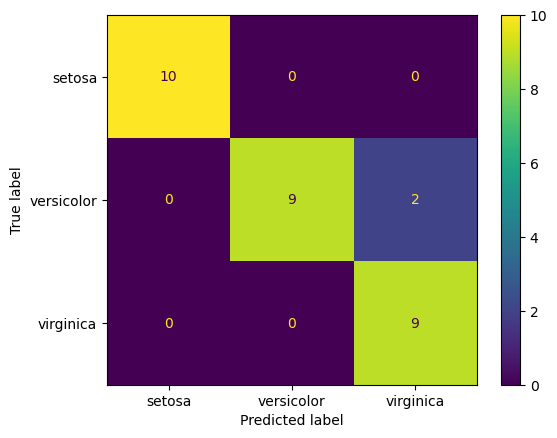

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_df['5'])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_set[-1].classes_)
disp.plot()

## 多クラス分類における評価指標

In [30]:
# データロード
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# モデル学習
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)
# 予測
y_pred = model.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [31]:
from sklearn.metrics import precision_score

In [32]:
precision_score(y_test, y_pred, average = "macro")

0.9511784511784511

In [36]:
precision_score(y_test, y_pred, average = None).mean()

0.9511784511784511

## Precision Recall Curve

In [38]:
df = pd.read_csv('heart_preprocessed.csv')

In [39]:
df.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_electrocardiographic_left ventricular hypertrophy,rest_electrocardiographic_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_normal,thalassemia_reversable defect
0,52,125,212,168,1.0,2,0,1,0,0,1,1,0,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,0,0,1,0,0,1,1,0,1,0,1
2,70,145,174,125,2.6,0,0,1,0,0,1,1,0,0,1,0,1,0,1
3,61,148,203,161,0.0,1,0,1,0,0,1,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,3,0,0,0,0,1,0,0,0,0,1,0,1,0


In [58]:
y_col = 'target'
X = df.drop(columns = [y_col])
y = df[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test) #閾値が50%

In [43]:
y_pred_proba[:10]

array([[0.49520585, 0.50479415],
       [0.28366802, 0.71633198],
       [0.99732492, 0.00267508],
       [0.06897633, 0.93102367],
       [0.47851468, 0.52148532],
       [0.99002332, 0.00997668],
       [0.66307864, 0.33692136],
       [0.7927538 , 0.2072462 ],
       [0.3021324 , 0.6978676 ],
       [0.3021324 , 0.6978676 ]])

In [44]:
model.classes_

array([0, 1])

In [45]:
from sklearn.metrics import precision_recall_curve

In [46]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

Text(0.5, 1.0, 'Precision recall curve')

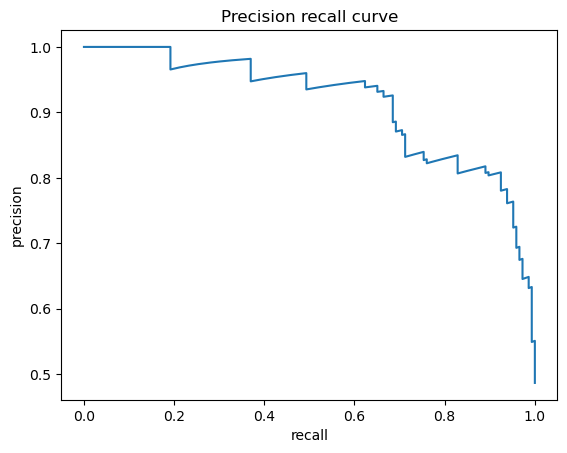

In [54]:
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision recall curve')

In [47]:
precision[:10]

array([0.48666667, 0.48993289, 0.49324324, 0.49491525, 0.49829352,
       0.5       , 0.50171821, 0.50344828, 0.50519031, 0.5087108 ])

In [48]:
recall[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [50]:
thresholds[:10]

array([0.00035687, 0.00129168, 0.00157549, 0.00174841, 0.00201324,
       0.0021293 , 0.00260159, 0.00267508, 0.00312424, 0.00333925])

In [63]:
# 調和平均ver
from scipy.stats import hmean
from sklearn.metrics import recall_score, precision_score
hmean([recall_score(y_test, y_pred), precision_score(y_test, y_pred)])

0.8469055374592833

## F値

In [72]:
from sklearn.metrics import f1_score

In [57]:
f1_score(y_test, y_pred)

0.8469055374592833

In [74]:
thresholds2 = np.append(thresholds, 1.0)

In [77]:
temp_df = pd.DataFrame()
temp_df['thresholds'] = thresholds2
temp_df['precision'] = precision
temp_df['recall'] = recall
temp_df['f1_score'] = hmean([temp_df['recall'], temp_df['precision']])

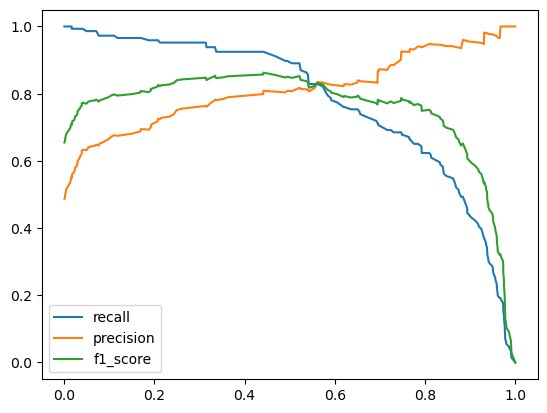

In [84]:
plt.plot(temp_df['thresholds'], temp_df['recall'], label = 'recall')
plt.plot(temp_df['thresholds'], temp_df['precision'], label = 'precision')
plt.plot(temp_df['thresholds'], temp_df['f1_score'], label = 'f1_score')
plt.legend()

In [89]:
# 最も良いf1_scoreのインデックス番号
np.argmax(temp_df['f1_score'])

89

In [90]:
# その閾値
thresholds[np.argmax(temp_df['f1_score'])]

0.44164670248434684

In [91]:
temp_df['f1_score'].iloc[np.argmax(temp_df['f1_score'])]

0.8626198083067093